# Exponential Families


(multi-gaussian)=
## Multivariate Gaussian


### Definition

Definition (Multivariate normal)
: A $p$-variate random vector $\boldsymbol{x}$ is said to have a multivariate normal distribution (multinormal distribution) if **every** linear combination of its components has a univariate normal distribution. That is, $\boldsymbol{c} ^{\top} \boldsymbol{x} \sim \mathcal{N} (\boldsymbol{c} ^{\top} \boldsymbol{\mu} _x,  \boldsymbol{c} ^{\top}  \boldsymbol{\Sigma}_x \boldsymbol{c})$ for any $\boldsymbol{c} \in \mathbb{R} ^p$.

For a multivariate normal distribution $\boldsymbol{x} \sim \mathcal{N}(\boldsymbol{\mu} , \boldsymbol{\Sigma} )$, the probability density function is


$$
\begin{equation}
f(\boldsymbol{x} ;\boldsymbol{\mu}, \boldsymbol{\Sigma})=\frac{1}{(2 \pi)^{p / 2}|\boldsymbol{\Sigma}|^{1 / 2}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})\right)
\end{equation}
$$


where
- $\boldsymbol{\mu}$ is the mean vector
- $\boldsymbol{\Sigma}$ is the covariance matrix, with $\sigma_{ij} = \operatorname{Cov}\left( x_i, x_j \right)$
- The fraction $\frac{1}{(2 \pi)^{p / 2}|\boldsymbol{\Sigma}|^{1 / 2}}$ is a normalizing constant.
- The determinant $\left\vert \boldsymbol{\Sigma}  \right\vert = \operatorname{det}(\boldsymbol{\Sigma})$ is called [generalized variance](covariance-matrix). It can be viewed as a higher dimension generalization of the scalar-valued $\sigma^2$ in univariate case that measures uncertainty of the distribution. Hence we have the square root $\left\vert \cdot \right\vert ^{1/2}$, as $\sigma$ in the univariate Gaussian density.


### Visualization

All $\boldsymbol{x}$ satisfy the equality below lies on a ellipsoid contour, with equal Mahalanobis distance to its center $\boldsymbol{\mu}$.


$$\begin{aligned}
c &= f(\boldsymbol{x} ;\boldsymbol{\mu}, \boldsymbol{\Sigma}) \\
\Leftrightarrow \qquad c ^\prime &= (\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})
\end{aligned}$$

- $\boldsymbol{\mu}$ determines the center of the ellipsoid.
- Let EVD $\boldsymbol{\Sigma} = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U}$, then
  - $\boldsymbol{U}$ determines the rotation angle of the ellipsoid. The vectors $\boldsymbol{u} _i$ are the directions of the axes of the ellipsoid.
  - $\boldsymbol{\Lambda}$ determines the lengths of the axes. The length should be proportional to $\sqrt{\lambda_i}$. If all eigenvalues are the same, the ellipsoid reduces to a ball.
- (To be shown below) the rotation transformation $\boldsymbol{x} ^\prime  = \boldsymbol{U} ^\top \boldsymbol{x}, \boldsymbol{\mu} ^\prime  = \boldsymbol{U} ^\top \boldsymbol{\mu}, \boldsymbol{\Sigma} ^\prime  = \boldsymbol{\Lambda}$ change the center, align the ellipsoid axes to the coordinate axes (so the variables becomes independent and the joint PDF factorizes to univariate PDF), while keep the axes lengths intact (rotation preserve lengths and angles).

In the 2-d case, an ellipsoid reduces to an ellipse.

:::{figure,myclass} gaussian-density-2d
<img src="../imgs/gaussian-density-2d.png" width = "80%" alt=""/>

Bivariate Gaussian density and ellipse
:::

A numerical example to illustrate how $\boldsymbol{\mu}, \boldsymbol{\Lambda} , \boldsymbol{U}$ jointly decide the distribution of $\boldsymbol{x}$, and the effect of rotation transformation (rotation) $\boldsymbol{U} ^{\top} \boldsymbol{x}$

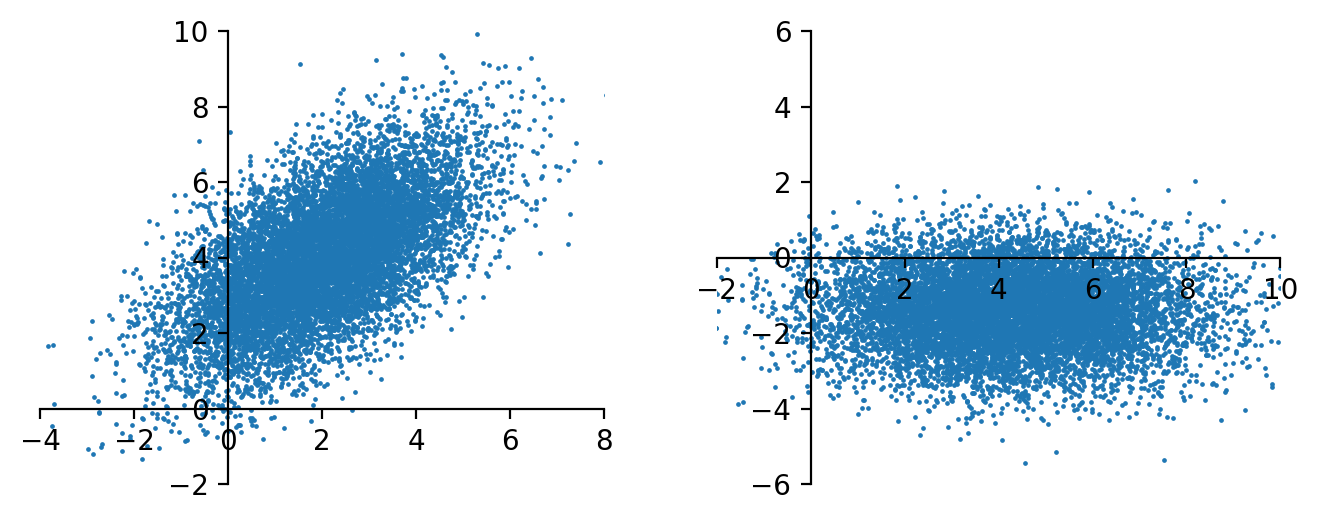

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
mu = [2,4]
Lam = np.diag([4,1])
U = np.asarray([[1,1], [1,-1]]/np.sqrt(2))
S = U @ Lam @ U.T
n = 10000
np.random.seed(1)
X = np.random.multivariate_normal(mean=mu, cov=S, size=n)
fig, ax = plt.subplots(1,2, figsize=(8,3), dpi=200)
ax[0].scatter(X[:,0], X[:,1], s=0.5)
ax[0].set_ylim(-2, 10)
ax[0].set_xlim(-4, 8)
ax[0].spines.left.set_position('zero')
ax[0].spines.bottom.set_position('zero')
ax[0].spines.right.set_color('none')
ax[0].spines.top.set_color('none')

# print(f'new center: {mu @ U.T}')
X2 = X @ U.T
ax[1].scatter(X2[:,0], X2[:,1], s=0.5)
ax[1].set_ylim(-6, 6)
ax[1].set_xlim(-2, 10)
ax[1].spines.left.set_position('zero')
ax[1].spines.bottom.set_position('zero')
ax[1].spines.right.set_color('none')
ax[1].spines.top.set_color('none')

plt.show()

### Properties

- Sometimes $\boldsymbol{\varepsilon} \sim \mathcal{N} (\boldsymbol{0} , \boldsymbol{I} _p)$ is called **white noise**. If the off-diagonal entires are non-zero, we say there is 'color'.
- **MGF**: $M_{\boldsymbol{x}}(\boldsymbol{t})=\exp \left(\boldsymbol{t}^{\top} \boldsymbol{\mu}+\frac{1}{2} \boldsymbol{t}^{\top} \boldsymbol{\Sigma} \boldsymbol{t}\right)$.
- **Sum**: if $\boldsymbol{x} \sim \mathcal{N} _p (\boldsymbol{\mu} _1, \boldsymbol{\Sigma} _1)$ and $\boldsymbol{y} \sim \mathcal{N} _p (\boldsymbol{\mu} _2, \boldsymbol{\Sigma} _2)$ are independent, then $\boldsymbol{x} + \boldsymbol{y}  \sim \mathcal{N} _p (\boldsymbol{\mu} _1 + \boldsymbol{\mu} _2, \boldsymbol{\Sigma} _1 + \boldsymbol{\Sigma} _2)$.
- What is the condition for a valid covariance matrix $\boldsymbol{\Sigma}$? Given a positive definite matrix $\boldsymbol{\Sigma}$, then $\boldsymbol{x} \sim \mathcal{N} _p (\boldsymbol{\mu} , \boldsymbol{\Sigma})$ iff there exists a non-singular matrix $\boldsymbol{B}$ and $\boldsymbol{z} \sim \mathcal{N} _p (\boldsymbol{0} , \boldsymbol{I})$ such that $\boldsymbol{x} = \boldsymbol{\mu} + \boldsymbol{B} \boldsymbol{z}$. In this case $\boldsymbol{\Sigma} = \boldsymbol{B} \boldsymbol{B} ^{\top}$.
- **Sub-vectors**: if $\boldsymbol{x} \in \mathcal{N} _{p + q} (\boldsymbol{\mu} , \boldsymbol{\Sigma})$, let $\boldsymbol{x}_1$ be its first $p$ components and $\boldsymbol{x} _2$ be the rest $q$ components, then
  - still normal: $\boldsymbol{x}_{1} \sim \mathcal{N}_{p}\left(\boldsymbol{\mu}_{1}, \boldsymbol{\Sigma}_{11}\right),  \boldsymbol{x}_{2} \sim \mathcal{N}_{q}\left(\boldsymbol{\mu}_{2}, \boldsymbol{\Sigma} _{22}\right)$
  - $\boldsymbol{x} _1$ and $\boldsymbol{x} _2$ are independent iff $\operatorname{Cov}\left( \boldsymbol{x} _1, \boldsymbol{x} _2 \right) = \boldsymbol{\Sigma} _{12} = \boldsymbol{0}_{p \times q}$ (hint for $\Leftarrow$: use definition $f_{12} = f_1 f_2$)
  - $(\boldsymbol{x} _1 - \boldsymbol{\Sigma} _{12} \boldsymbol{\Sigma} _{22} ^{-1} \boldsymbol{x} _2)$ is independent of $\boldsymbol{x} _2$ and is distributed as $\mathcal{N} _p (\boldsymbol{\mu} _1 -  \boldsymbol{\Sigma} _{12} \boldsymbol{\Sigma} _{22} ^{-1} \boldsymbol{\mu} _2, \boldsymbol{\Sigma} _{11}-  \boldsymbol{\Sigma} _{12} \boldsymbol{\Sigma} _{22} ^{-1} \boldsymbol{\Sigma} _{21})$.
  - conditional distribution is normal:

    $$
    \boldsymbol{x}_{1} \mid \boldsymbol{x}_{2} \sim  N_{p}\left(\boldsymbol{\mu}_{1}+\boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1}\left(\boldsymbol{x}_{2}-\boldsymbol{\mu}_{2}\right), \boldsymbol{\Sigma}_{11}-\boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1} \boldsymbol{\Sigma}_{21}\right)
    $$

    Note the variance does not change with $\boldsymbol{x} _2$. In particular,
    - for $p=q=1$,

      $$
      \begin{aligned}
      X_{1} \mid X_{2}=x_{2} \sim & N\left(\mu_{1}+\frac{\sigma_{12}}{\sigma_{22}}\left(x_{2}-\mu_{2}\right), \sigma_{11}-\frac{\sigma_{12}^{2}}{\sigma_{22}}\right) \\
      &=N\left(\mu_{1}+\rho \frac{\sigma_{1}}{\sigma_{2}}\left(x_{2}-\mu_{2}\right), \sigma_{1}^{2}\left(1-\rho^{2}\right)\right)
      \end{aligned}
      $$
    - if $p=1$, then $x_1 = \mu_1 + \boldsymbol{\beta} ^{\top} (\boldsymbol{x} _2 - \boldsymbol{\mu} _2)$, i.e. a 'regression' model, where $\boldsymbol{\beta} ^{\top} = \boldsymbol{\Sigma}_{12} \boldsymbol{\Sigma}_{22}^{-1}$. Let $\boldsymbol{\Omega} = \boldsymbol{\Sigma} ^{-1}$, using block matrix inverse [formula](matrix-inverse), it is easy to show that $\beta_j = - \omega_{1j}/\omega_{11}$.

    :::{figure,myclass} gaussian-marginal-conditional
    <img src="../imgs/gaussian-marginal-conditional.png" width = "80%" alt=""/>

    Marginal Gaussian and conditional Gaussian are also Gaussians [Shi 2021]
    :::

- **Transformation**: If $\boldsymbol{x}$ is $p$-variate normal $\mathcal{N} (\boldsymbol{\mu} , \boldsymbol{\Sigma})$, and $\boldsymbol{y} = \boldsymbol{A} \boldsymbol{x} + \boldsymbol{c}$, where $\boldsymbol{A}$ is a $k \times p$ matrix and $\boldsymbol{c}$ is a $k$-vector of constants, then $\boldsymbol{y}$ is of $k$-variate normal, with mean $\boldsymbol{A} \boldsymbol{\mu} + \boldsymbol{c}$ and variance $\boldsymbol{A} \boldsymbol{\Sigma} \boldsymbol{A} ^{\top}$.
  - If $k=1$, then $\boldsymbol{y} = \boldsymbol{a} ^{\top} \boldsymbol{x} \sim \mathcal{N} ( \boldsymbol{a} ^{\top} \boldsymbol{\mu} , \boldsymbol{a} ^{\top} \boldsymbol{\Sigma} \boldsymbol{a})$
  - if $\boldsymbol{x}$ is standard normal $\mathcal{N}(\boldsymbol{0}, \boldsymbol{I})$, then $\boldsymbol{y} \sim \mathcal{N} (\boldsymbol{c} , \boldsymbol{A} \boldsymbol{A} ^{\top})$
- **Independency** after transformation: for any $m\times p$ matrix $\boldsymbol{A}$ and $n\times p$ matrix $\boldsymbol{B}$,
  - $\boldsymbol{A} \boldsymbol{x}  \perp \boldsymbol{B} \boldsymbol{x} \Leftrightarrow \boldsymbol{A} \boldsymbol{\Sigma} \boldsymbol{B} ^{\top} = \boldsymbol{0}$
    - corollary: $X_i \perp X_j \Leftrightarrow \sigma_{ij} =0$.
  - when $\boldsymbol{A}$ is symmetric, $\boldsymbol{x} ^{\top}\boldsymbol{A} \boldsymbol{x}  \perp \boldsymbol{B} \boldsymbol{x} \Leftrightarrow \boldsymbol{B} \boldsymbol{\Sigma} \boldsymbol{A} = \boldsymbol{0}$
  - when both $\boldsymbol{A}, \boldsymbol{B}$ are symmetric, $\boldsymbol{x} ^{\top}\boldsymbol{A} \boldsymbol{x}  \perp \boldsymbol{x} ^{\top} \boldsymbol{B} \boldsymbol{x} \Leftrightarrow \boldsymbol{A} \boldsymbol{\Sigma} \boldsymbol{B} = \boldsymbol{0}$
- Since EVD $\boldsymbol{\Sigma} = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top$, then $\left\vert \boldsymbol{\Sigma}  \right\vert = \left\vert \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top  \right\vert = \left\vert \boldsymbol{\Lambda}  \right\vert$
- For every multivariate Gaussian $\boldsymbol{x} \sim N(\boldsymbol{\mu} , \boldsymbol{\Sigma} )$ with $\boldsymbol{\Sigma}
  = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top$, there exists a transformation $\boldsymbol{x} ^\prime  = \boldsymbol{U} ^\top \boldsymbol{x}, \boldsymbol{\mu} ^\prime = \boldsymbol{U} ^\top \boldsymbol{\mu}$ such that

  $$
  f(\boldsymbol{x} ; \boldsymbol{\mu}, \boldsymbol{\Sigma} ) = f(\boldsymbol{x} ^\prime ; \boldsymbol{\mu} ^\prime , \boldsymbol{\Lambda})
  $$

  where

  $$\begin{align}
  f(\boldsymbol{x} ^\prime ; \boldsymbol{\mu} ^\prime , \boldsymbol{\Lambda})
  &= \frac{1}{(2 \pi)^{p / 2}|\boldsymbol{\Lambda}|^{1 / 2}} \exp \left(-\frac{1}{2}(\boldsymbol{x}^\prime -\boldsymbol{\mu} ^\prime )^{\top} \boldsymbol{\Lambda} ^{-1}(
    \boldsymbol{x} ^\prime  -\boldsymbol{\mu} ^\prime )\right) \\
  &=  \frac{1}{(2 \pi)^{p / 2}\Pi_{i=1}^p \lambda_i} \exp \left(-\sum_{i=1}^p\frac{1}{2\sigma_{ii}}(x_i^\prime -\mu_i ^\prime )^2\right) \\
  &= \prod_{i=1}^{p} \frac{1}{(2 \pi)^{1 / 2} \lambda_{i}} \exp \left(-\frac{1}{2 \lambda_{i}}\left(x_{i}^\prime -\mu_{i}^\prime \right)^{2}\right)
  \end{align}$$

  which is a product of PDFs of univariate Gaussians, i.e. dependency is dropped. Geometrically, $\boldsymbol{U}$ rotate the axes of the distribution but keep the function value intact.

- **Quadratic form**: if $\boldsymbol{x} \sim \mathcal{N} _p (\boldsymbol{\mu} , \boldsymbol{\Sigma})$ and $\boldsymbol{\Sigma}$ is p.d., then $(\boldsymbol{x} - \boldsymbol{\mu} ) ^{\top} \boldsymbol{\Sigma} ^{-1} (\boldsymbol{x} - \boldsymbol{\mu} ) \sim \chi ^2 _p$.
  - For standard Gaussian $\boldsymbol{z} \sim \mathcal{N} _p (\boldsymbol{0} , \boldsymbol{I})$: $$\boldsymbol{z} ^{\top} \boldsymbol{z} = \sum_{j=1}^p Z_i^2 \sim \chi ^2 _p$$
  - In sample data, as $n$ is large, $n(\bar{\boldsymbol{x}}-\boldsymbol{\mu})^{\prime} \boldsymbol{S}^{-1}(\bar{\boldsymbol{x}}-\boldsymbol{\mu}) \sim \chi_{p}^{2}$

- Related to unit surface: if $\boldsymbol{x}$ follow spherical Gaussian $\mathcal{N}_p (\boldsymbol{0} , \sigma^2 \boldsymbol{I} _p)$, let the norm be $R = \left\| \boldsymbol{x}\right\|$, then its density is

    $$
    f_p(r) = \frac{S_p}{  (2 \pi \sigma^2)^{p / 2}} r^{p -1} \exp \left( -\frac{r^2}{2 \sigma^2 }  \right), \quad r \ge 0
    $$

    where $S_p=\frac{2 \pi^{p / 2}}{\Gamma(p / 2)}$ is the surface area of the unit sphere in $p$-dimensions.
    - When $r= \sqrt{\sigma^2 (p-1)}$, $f_p(r)$ achieves its maximum. That is, it characterizes the unit spherical shell that has the 'most' points on it among all unit spherical shells in $\mathbb{R} ^p$.
    - if $\sigma^2$ is fixed, then the optimal radius scales sub-linearly in $d$, i.e. $r^* = \mathcal{O}(\sqrt{p})$
    - if we set $\sigma^2 = 1/d$, then $r = \sqrt{(p-1)/p} \approx 1$. See below.

- In high-dimensional case, as $p \rightarrow \infty$,
  - independent Gaussian points with variance $\frac{1}{p}$ concentrate on the surface of sphere $S^{p-1}$, i.e.

    $$\mathcal{N} _p (\boldsymbol{0} , p ^{-1}  \boldsymbol{I} _p) \approx \operatorname{Unif} (S^{p-1})$$

  - for $\boldsymbol{x} , \boldsymbol{y} \sim \mathcal{N} _p(\boldsymbol{0} , \frac{1}{p} \boldsymbol{I} _p)$, we have
      - $\mathbb{E} [\boldsymbol{x} ^{\top} \boldsymbol{x} ] = \sum_{i=1}^p \mathbb{E} [X_j^2] = \sum_{j=1}^p \frac{1}{p} = 1$
      - $\mathbb{E} [\boldsymbol{x} ^{\top} \boldsymbol{y} ] = \sum_{j=1}^p \mathbb{E} [X_j Y_j]  = \sum_{j=1}^p \mathbb{E} [X_j] \mathbb{E} [Y_j] = 0$.
      - $\mathbb{E} [\left\| \boldsymbol{a} ^{\top} \boldsymbol{x} \right\| ^2 ] = \sum_{j=1}^p a_j ^2 \mathbb{E} [X_j^2] + \sum_{j\ne k}^p a_j a_k \mathbb{E} [X_j X_k]  = \sum_{j=1}^p \frac{a_j^2}{p}  = \frac{1}{p} \left\| \boldsymbol{a}  \right\|^2$
      - $\left\| \boldsymbol{x}  \right\| \rightarrow 1$
      - $\boldsymbol{x} ^{\top} \boldsymbol{y} \rightarrow 0$
      - $\boldsymbol{a} ^{\top} \boldsymbol{x} \rightarrow 0$ for $\left\| \boldsymbol{a}  \right\| =1$.


### Estimation

#### MLE

The MLE of $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$ are respectively

```{margin}
For derivation see [here](MLE-Gaussian-derivation).
```

$$
\hat{\boldsymbol{\mu}}=\overline{\boldsymbol{x}} \text { and } \hat{\mathbf{\Sigma}}=\frac{\boldsymbol{W}}{n}=\frac{(n-1) \boldsymbol{S}}{n}
$$

Note that $\hat{\boldsymbol{\mu}}$ is unbiased but $\hat{\boldsymbol{\Sigma} }$ is unbiased. However, $\boldsymbol{S}$ is unbiased for $\boldsymbol{\Sigma}$.

(wishart-distribution)=
#### Wishart Distribution

Recall that for univariate i.i.d. standard Gaussians we have $\sum_{i=1}^k Z_i^2 \sim \sigma^2 \chi ^2 _n$. The multivariate extension of this chi-squared distribution is Wishart distribution.

Definition (Wishart distribution)
: Suppose $\boldsymbol{x}_1, \ldots, \boldsymbol{x} _k$ and independent $\mathcal{N} _p (\boldsymbol{\mu} _i, \boldsymbol{\Sigma})$. Define a symmetric $p \times p$ matrix $\boldsymbol{V}$ as

  $$
  \boldsymbol{V} = \sum_{i=1}^k \boldsymbol{x} _i \boldsymbol{x}_i ^{\top} = \boldsymbol{X} ^{\top} \boldsymbol{X}
  $$

  Then $\boldsymbol{V}$ is said to follow a Wishart distribution $W_p(k, \boldsymbol{\Sigma} , \boldsymbol{\Psi})$, where
  - $n$ is the degree of freedom
  - $\boldsymbol{\Sigma}$ is called the **scaling matrix**
  - $\boldsymbol{\Psi} = \sum_{i=1}^k \boldsymbol{\mu} _i \boldsymbol{\mu} _i ^{\top}$ is the $p \times p$ symmetric **non-centrality matrix**
    - If $\boldsymbol{\Psi} = \boldsymbol{0}$, it is called the **central** Wishart distribution, denoted by $W_p(k, \boldsymbol{\Sigma})$

When $p=1$ and $\boldsymbol{\Sigma} = \sigma^2$, it reduces to a non-central chi-sqaured distribution $\sigma^2 \chi ^2 (k, \sum_{i=1}^k  \boldsymbol{\mu} _i^2)$.

Properties
: - **sum of independent**: if $\boldsymbol{V} _1 \sim W_p(k, \boldsymbol{\Sigma} , \boldsymbol{\Psi} _1)$ and $\boldsymbol{V} _2 \sim W_p(k, \boldsymbol{\Sigma} , \boldsymbol{\Psi} _2)$ are independent Wisharts, then $\boldsymbol{V} _1 + \boldsymbol{V} _2 \sim W_p (k_1 + k_2, \boldsymbol{\Sigma} , \boldsymbol{\Psi} _1 + \boldsymbol{\Psi} _2)$.
  - **transformation**: if $\boldsymbol{V} \sim W_p (k, \boldsymbol{\Sigma} , \boldsymbol{\Psi})$, then
      - for any constant $q \times p$ matrix $\boldsymbol{A}$, $\boldsymbol{A} \boldsymbol{V} \boldsymbol{A} ^{\top} \sim W_q (k, \boldsymbol{A} \boldsymbol{\Sigma} \boldsymbol{A} ^{\top} , \boldsymbol{A} \boldsymbol{\Psi} \boldsymbol{A} ^{\top})$.
      - for any constant $\boldsymbol{a}$, $\boldsymbol{a}^{\top} \boldsymbol{V} \boldsymbol{a} / \boldsymbol{a}^{\top} \boldsymbol{\Sigma} \boldsymbol{a} \sim \chi^{2}\left(k, \boldsymbol{a}^{\top} \boldsymbol{\Psi} \boldsymbol{a}\right)$. In particular, $v_{ii}/\sigma_{ii} \sim \chi ^2 (k, \Phi_{ii})$.
      - for any random vector $\boldsymbol{y}$ independent of $\boldsymbol{V} \sim W_p(k, \boldsymbol{\Sigma})$,
        - $\boldsymbol{y}^{\top} \boldsymbol{V} \boldsymbol{y} / \boldsymbol{y}^{\top} \boldsymbol{\Sigma} \boldsymbol{y} \sim \chi^{2}(k)$ and is independent of $\boldsymbol{y}$.
        - $\boldsymbol{y}^{\top} \boldsymbol{\Sigma}^{-1} \boldsymbol{y} / \boldsymbol{y}^{\top} \boldsymbol{V}^{-1} \boldsymbol{y} \sim \chi^{2}(k-p+1)$ if $k > p$, and is independent of $\boldsymbol{y}$.
  - for random $k \times p$ matrix $\boldsymbol{X}$,
    - for a symmetric $\boldsymbol{A}: \boldsymbol{X}^{\top} \boldsymbol{A} \boldsymbol{X} \sim W_{p}(r, \boldsymbol{\Sigma}, \boldsymbol{\Psi}) \Leftrightarrow \boldsymbol{A} ^2 = \boldsymbol{A}$ (idempotent), in which case $r=\operatorname{rank}(\boldsymbol{A})=\operatorname{tr}(\boldsymbol{A})$ and $\boldsymbol{\Psi}=\boldsymbol{M}^{\top} \boldsymbol{A} \boldsymbol{M}$
    - for symmetric idempotent $\boldsymbol{A}, \boldsymbol{B}$, we have $\boldsymbol{X} ^{\top} \boldsymbol{A} \boldsymbol{X}  \perp \boldsymbol{X} ^{\top} \boldsymbol{B} \boldsymbol{X} \Leftrightarrow \boldsymbol{A} \boldsymbol{B} = \boldsymbol{0}$.
    - for symmetric idempotent $\boldsymbol{A}$, we have $\boldsymbol{X} ^{\top} \boldsymbol{A} \boldsymbol{X}  \perp \boldsymbol{X} ^{\top} \boldsymbol{B} \Leftrightarrow \boldsymbol{A} \boldsymbol{B} = \boldsymbol{0}$.

  - Gaussian MLE
    - $\bar{\boldsymbol{x}} \sim \mathcal{N} _p (\boldsymbol{\mu} , \frac{1}{n} \boldsymbol{\Sigma} )$
    - $(n-1) \boldsymbol{S} = \boldsymbol{W} \sim W_p(n-1, \boldsymbol{\Sigma})$, extension of $\sum_{i=1}^n (x_i - \bar{x})^2 \sim \sigma^2\chi ^2 _{n-1}$
    - $\bar{\boldsymbol{x} } \perp \boldsymbol{S}$

  - In the Cholesky decomposition $\boldsymbol{V} = \boldsymbol{T} \boldsymbol{T}  ^{\top}$ of $\boldsymbol{V} \sim W_p (k, \boldsymbol{\Sigma})$, where $\boldsymbol{T}$ is lower triangular,
    - off-diagonal $t_{ij} \sim \mathcal{N} (0,1)$ for $i >j$
    - diagonal $t_{ii} \sim \chi ^2 _{k-i+1}$
    - all non-zero elements are mutually independent

  - If $\boldsymbol{x}_i \sim \mathcal{N} (\boldsymbol{0} , \boldsymbol{I} _p)$, then the eigenvalues of a $\frac{1}{n} \boldsymbol{X} ^{\top} \boldsymbol{X}$, as $p, n \rightarrow \infty$, follows [Marchenko–Pastur distribution](marchenko-pastur-distribution).
### Pros and Cons

Pros
- Related to CLM
- Evaluation is convenient
- Can be convert to product of univariate Gaussians in some rotated space
- Mixtures of Gaussian are sufficient to approximate a wide range of distributions
- Arbitrary linear combinations of jointly Gaussian variables are also Gaussian
- Marginals and conditionals of multivariate Gaussians are also Gaussian
- Sums of many i.i.d. random variables converge to Gaussian variables (Central Limit Theorem)
- Log of Gaussian looks like a weighted Euclidean distance, related to squared loss

    $$
    -\ln \sqrt{(2 \pi \sigma)}-\frac{(x-\mu)^{2}}{\left(2 \sigma^{2}\right)}
    $$


Cons
- $\boldsymbol{\Sigma}$ is hard and expensive to estimate in high dimensions
  - sol: assume special structure: diagonal, spherical


## Univariate Gaussian
### Test Normality

For most multivariate analyses, it is important that the data indeed follow the multivariate normal, at least approximately if not exactly.

- QQ-plots (quantile-quantile plot)

  - Sample quantiles are plotted against the expected sample quantiles of a standard normal distribution
  - If the points lie on a straight line, then it indicates univariate normality. In addition to measure this linearity by eye, we can also use correlation coefficient to quantify it.
  - non-linearity may indicate a need to transform the variable.

  :::{figure} gaussian-qq-plot
  <img src="../imgs/gaussian-qq-plot.png" width = "80%" alt=""/>

  QQ-plots for Gaussian (left) and non-Gaussian (right)
  :::

- P-P plot (probability against probability plot) that plots the sample CDF against the theoretical CDF.


- Shapiro–Wilk $W$ test
  - test statistic: a modified version of the squared sample correlation between the sample quantiles and the expected quantiles.
- Kolmogorov–Smirnov test
  - require: large sample, at least 100s
  - test statistic: maximum difference between the empirical CDF and the normal CDF.

- Jarque–Bera test

- Test for zero skewness, zero excess kurtosis.

Multivariate case:

- Check whether the squared generalized distance as defined below follows a chi-squared distribution by a Q-Q plot (necessary and sufficient conditions for very large sample size))

  $$
  d_{i}^{2}=\left(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}}\right)^{\prime} \boldsymbol{S}^{-1}\left(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}}\right)
  $$

  Again, correlation coefficient can be used to quantity the linearity of the points.

- Check each Principal Component (PC) for univariate normality (necessary condition; and if the sample size n is large enough, a sufficient condition)


(transform-normality)=
### Transformation to Near Normality

To achieve the multinormality of the data, univariate transformation is applied to each variable individually. After then, the multinormality of transformed variables is checked again (Notice that each of the $X_p$ variables after transformation is normally distributed does not imply that they jointly follow a multivariate normal distribution).

Assume $x > 0$.

- common method $\log x$
- based on theory:
  - Poisson count: $\sqrt{x}$
  - Binomial proportion: $\sin ^{-1} \sqrt{x}$
- Box-Cox transformation

  $$
  x_{i}^{[\lambda]}=\left\{\begin{array}{lll}
  \frac{x_{i}^{\lambda}-1}{\lambda} & \text { for } \lambda \neq 0 & , i=1, \ldots, n \\
  \log x_{i} & \text { for } \lambda=0 & , i=1, \ldots, n
  \end{array}\right.
  $$

  where $\lambda$ is unknown. It can be chosen by priori information of $\lambda$, or search among some values $3,2,1,\frac{1}{2}, \frac{1}{3}, 0$ and their negatives.

  Cons:
    - Box-Cox transformation **cannot** guarantee that the transformed variable is close to the normal distribution.
    - Choice of $\lambda$ depends on scale of $x_i$. Sol: power transform

- Power transform, where $G M(x)=\left(x_{1} x_{2} \cdots x_{n}\right)^{1 / n}$ is the geometric mean of observations.

  $$
  x_{i}^{[\lambda]}=\left\{\begin{array}{ll}
  \frac{x_{i}^{\lambda}-1}{\lambda[G M(x)]^{\lambda-1}}, & \text { if } \lambda \neq 0 \quad, i=1, \ldots, n \\
  G M(x) \log x_{i}, & \text { if } \lambda=0 \quad, i=1, \ldots, n
  \end{array}\right.
  $$

  The optimal $\lambda$ minimizes sample variance after transformation.

<!-- ## Weibull Distribution -->